In [54]:
import pandas as pd
import os
import seaborn as sns

os.getcwd()
all_data = pd.read_csv('input/train.csv')
all_data['relatives'] = all_data['SibSp'] + all_data['Parch']

In [55]:
all_data_x = all_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
all_data_y = all_data['Survived']
all_data_y.shape

(891,)

In [56]:
#test below 20 removes a column in test!!
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_prepared, y_test_prepared = train_test_split(all_data_x, all_data_y, test_size=0.18)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_sclare', StandardScaler())
])

num_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'relatives']
cat_attribs = ['Sex', 'Embarked']
full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', OneHotEncoder(), cat_attribs)
])

x_train_prepared = full_pipeline.fit_transform(x_train)
x_test_prepared = full_pipeline.fit_transform(x_test)

y_train_survived = (y_train_prepared == 1)

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, decoration, label=None):
    plt.plot(fpr, tpr, decoration, linewidth=2, label=label)
    plt.plot( [0, 1], [0, 1], 'k--')



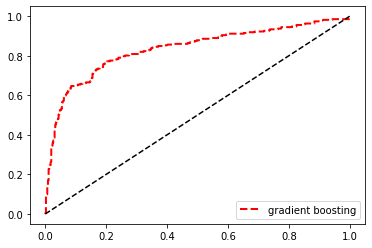

In [57]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1.0, max_depth=4)
gbc_clf.fit(x_train_prepared, y_train_survived)
y_scores_gbc = cross_val_predict(gbc_clf, x_train_prepared, y_train_survived, cv=10, method='decision_function')
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_train_survived, y_scores_gbc)

plot_roc_curve(fpr_gbc, tpr_gbc, 'r--', "gradient boosting")
plt.legend(loc="lower right")
plt.show()

In [58]:
print(x_train.shape)
print(x_test.shape)
#print(x_train.head)
#print(x_test.head)
print(x_train_prepared.shape)
print(x_test_prepared.shape)
#print(x_train_prepared)
#print(x_test_prepared)
print(y_train_prepared.shape)
print(y_test_prepared.shape)

(730, 8)

(161, 8)

(730, 12)

(161, 12)

(730,)

(161,)


In [59]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [2, 10, 50, 100, 1000], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_depth': [1, 2, 5, 10, 100]}]
#tuned_parameters = [{'n_estimators': [2], 'learning_rate': [10], 'max_depth': [1, 2]}]

scores = ['precision', 'recall', 'roc_auc']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring=score)
    clf.fit(x_train_prepared, y_train_prepared)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_prepared, clf.predict(x_test_prepared)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision




/home/toussaint/Documents/projets_rl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/home/toussaint/Documents/projets_rl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/home/toussaint/Documents/projets_rl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/home/toussaint/Documents/projets_rl/lib/pytho

Best parameters set found on development set:



{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}



Grid scores on development set:



0.000 (+/-0.000) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 2}

0.000 (+/-0.000) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 10}

0.000 (+/-0.000) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 50}

0.000 (+/-0.000) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 100}

0.000 (+/-0.000) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 1000}

0.000 (+/-0.000) for {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 2}

0.000 (+/-0.000) for {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 10}

0.000 (+/-0.000) for {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 50}

0.000 (+/-0.000) for {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 100}

0.000 (+/-0.000) for {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 1000}

0.000 (+/

/home/toussaint/Documents/projets_rl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/home/toussaint/Documents/projets_rl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/home/toussaint/Documents/projets_rl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_star

Best parameters set found on development set:



{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}



Grid scores on development set:



0.783 (+/-0.056) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 2}

0.783 (+/-0.056) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 10}

0.783 (+/-0.056) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 50}

0.783 (+/-0.056) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 100}

0.783 (+/-0.056) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 1000}

0.829 (+/-0.046) for {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 2}

0.830 (+/-0.046) for {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 10}

0.831 (+/-0.050) for {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 50}

0.831 (+/-0.050) for {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 100}

0.829 (+/-0.055) for {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 1000}

0.825 (+/-